In [2]:
!pip install scipy

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

df = pd.read_csv('/content/drive/MyDrive/Data Science Green Academy/DS 231015/Bald Probability/bald_probability.csv')
# df = pd.read_csv('bald_probability.csv')

# Mengecek total nilai null/NA di tiap kolom
df_na = df.isnull().sum()

# Mengisi nilai null dari kolom Age dengan nilai Mean dari age
mean_age = df["age"].mean()
df['age'].fillna(round(mean_age), inplace=True)

# Mengisi nilai null dari kolom gender dengan mayoritas gender
mode_gender = df['gender'].mode().values[0]
df['gender'].fillna(mode_gender, inplace=True)

# Mengisi nilai null dari kolom job_role dengan nilai 'Unspecified'
df['job_role'].fillna('Unspecified', inplace=True)

# Mengisi nilai null dari kolom province dengan nilai 'Others'
df['province'].fillna('Others', inplace=True)

# Mengisi nilai null dari kolom salary dengan nilai mean dari salary
mean_salary = df['salary'].mean()
df['salary'].fillna(mean_salary, inplace=True)

# Mengisi nilai null dari kolom salary dengan nilai mean dari is_married
mean_married = df['is_married'].mean()
df['is_married'].fillna(round(mean_married), inplace=True)

# Mengisi nilai null dari kolom salary dengan nilai mean dari is_hereditary
mean_hereditary = df['is_hereditary'].mean()
df['is_hereditary'].fillna(round(mean_hereditary), inplace=True)

# Mengisi nilai null dari kolom salary dengan nilai mean dari weight
mean_weight = df['weight'].mean()
df['weight'].fillna(mean_weight, inplace=True)

# Mengisi nilai null dari kolom salary dengan nilai mean dari height
mean_height = df['height'].mean()
df['height'].fillna(mean_height, inplace=True)

# Mengisi nilai null dari kolom shampoo dengan mayoritas shampoo
mode_shampoo = df['shampoo'].mode().values[0]
df['shampoo'].fillna(mode_shampoo, inplace=True)

# Mengisi nilai null dari kolom salary dengan nilai mean dari is_smoker
mean_smoke = df['is_smoker'].mean()
df['is_smoker'].fillna(round(mean_smoke), inplace=True)

# Mengisi nilai null dari kolom education dengan mayoritas education
mode_edu = df['education'].mode().values[0]
df['education'].fillna(mode_edu, inplace=True)

# Mengisi nilai null dari kolom stress dengan nilai mean dari stress
mean_stress = df['stress'].mean()
df['stress'].fillna(round(mean_stress), inplace=True)

# Menghapus baris data dengan kolom bald_prob bernilai Nan/null
df_null = df[df['bald_prob'].isnull()]
df = df.drop(df_null.index)

# Mengecek sekali lagi untuk nilai NaN di tiap kolom
df_na = df.isnull().sum()
df_na

age              0
gender           0
job_role         0
province         0
salary           0
is_married       0
is_hereditary    0
weight           0
height           0
shampoo          0
is_smoker        0
education        0
stress           0
bald_prob        0
dtype: int64

In [3]:
# Menghapus data dimana age kurang dari 20 tahun. ada kemungkinan ada kesalahan.
df_err = df[df['age'] < 10]
df = df[~df['age'].isin(df_err['age'])]

# Membuat kategori untuk age, salary, stress, dan bald_prob
# Membuat kategori umur dengan rentang 10 tahun agar dapat terlihat persebaran data ditiap kategori
df['age_range'] = df['age'].apply(lambda x: '0+' if x < 10
                                  else '10+' if 10 <= x < 20
                                  else '20+' if 20 <= x < 30
                                  else '30+' if 30 <= x < 40
                                  else '40+' if 40 <= x < 50
                                  else '50+' if 50 <= x < 60
                                  else '60+' if 60 <= x < 70
                                  else '70+' if 70 <= x < 80
                                  else '80+')

# Membagi salary sama seperti umur karena gaji di Indonesia tidak merata
# Kategori 1 -> gaji Rp. 0 s.d. Rp. 10.000.000,-
# Kategori 2 -> gaji Rp. 10.000.000,- s.d. Rp. 20.000.000,-
# Kategori 3 -> gaji Rp. 20.000.000,- s.d. Rp. 30.000.000,-
# Kategori 4 -> gaji Rp. 30.000.000,- s.d. Rp. 40.000.000,-
# Kategori 5 -> gaji Rp. 40.000.000,- s.d. ~
df['salary_range'] = df['salary'].apply(lambda x: 'Category 1' if x < 10000000
                                        else 'Category 2' if 10000000 <= x < 20000000
                                        else 'Category 3' if 20000000 <= x < 30000000
                                        else 'Category 4' if 30000000 <= x < 40000000
                                        else 'Category 5')

# Membuat kategori stress
# Level 1 -> 1 s.d. 3
# Level 2 -> 4 s.d. 6
# Level 3 -> 7 s.d. 9
# Level 4 -> 10
df['stress_range'] = df['stress'].apply(lambda x: "Level 1" if x <= 3
                                                     else "Level 2" if 4 <= x <= 6
                                                     else "Level 3" if 7 <= x <= 9
                                                     else "Level 4")

# Dikarenakan kolom akhir (label) bernilai desimal, mk akan dibagi menjadi low risk dan high risk
df['probability'] = df['bald_prob'].apply(lambda x: 'Low' if x <= 0.5
                                        else 'High')

# Membuat kolom map untuk is_married, is_smoker dan is_hereditary dengan 0 -> No dan 1 -> Yes. Tujuannya untuk visualisasi
df['marriage_status'] = df['is_married'].apply(lambda x: 'Yes' if x == 1 else 'No')
df['smoking'] = df['is_smoker'].apply(lambda x: 'Yes' if x == 1 else 'No')
df['family_hereditary'] = df['is_hereditary'].apply(lambda x: 'Yes' if x == 1 else 'No')

# Export dataset untuk visualisasi dengan PowerBI
# df.to_csv('bald_prob_updated.csv', index=False)
df.columns

<ipython-input-3-11067940be50>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['age_range'] = df['age'].apply(lambda x: '0+' if x < 10
<ipython-input-3-11067940be50>:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['salary_range'] = df['salary'].apply(lambda x: 'Category 1' if x < 10000000
<ipython-input-3-11067940be50>:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the docume

Index(['age', 'gender', 'job_role', 'province', 'salary', 'is_married',
       'is_hereditary', 'weight', 'height', 'shampoo', 'is_smoker',
       'education', 'stress', 'bald_prob', 'age_range', 'salary_range',
       'stress_range', 'probability', 'marriage_status', 'smoking',
       'family_hereditary'],
      dtype='object')

**Membagi kolom-kolom yang ada untuk melakukan korelasi terhadap kolom bald_prob**

kolom kategorikal ordinal-disktrit['age_range', 'salary_range', 'stress_range', 'job_role', 'province', 'shampoo', 'education']. Metode yang dilakukan untuk korelasi adalah metode spearman

kolom binary['is_married', 'is_hereditary', 'is_smoker']. Metode yang dipakai adalah chi-squared

kolom rasio['weight', 'height']. Metode yang dipakai adalah pearson

In [4]:
# korelasi bald_prob terhadap kolom kategorikal ordinal-disktrit
corr_age_range = df['bald_prob'].corr(df['age_range'], method="spearman")
corr_salary_range = df['bald_prob'].corr(df['salary_range'], method="spearman")
corr_stress_range = df['bald_prob'].corr(df['stress_range'], method="spearman")
corr_job_range = df['bald_prob'].corr(df['job_role'], method="spearman")
corr_province = df['bald_prob'].corr(df['province'], method="spearman")
corr_shampoo = df['bald_prob'].corr(df['shampoo'], method="spearman")
corr_education = df['bald_prob'].corr(df['education'], method="spearman")

corr_married, p_married = stats.pointbiserialr(df['is_married'], df['bald_prob'])
corr_hereditary, p_hereditary = stats.pointbiserialr(df['is_hereditary'], df['bald_prob'])
corr_smoking, p_smoking = stats.pointbiserialr(df['is_smoker'], df['bald_prob'])

corr_weight = df['bald_prob'].corr(df['weight'], method='pearson')
corr_height = df['bald_prob'].corr(df['height'], method='pearson')

print(f"Korelasi bald_prob dengan age_range {corr_age_range}")
print(f"Korelasi bald_prob dengan salary_range {corr_salary_range}")
print(f"Korelasi bald_prob dengan stress_range {corr_stress_range}")
print(f"Korelasi bald_prob dengan job_role {corr_job_range}")
print(f"Korelasi bald_prob dengan province {corr_province}")
print(f"Korelasi bald_prob dengan shampoo {corr_shampoo}")
print(f"Korelasi bald_prob dengan education {corr_education}")
print('\n')
print(f"Korelasi bald_prob dengan is_married {corr_married}, {p_married}")
print(f"Korelasi bald_prob dengan is_hereditary {corr_hereditary}, {p_hereditary}")
print(f"Korelasi bald_prob dengan is_smoker {corr_smoking}, {p_smoking}")
print('\n')
print(f"Korelasi bald_prob dengan weight {corr_weight}")
print(f"Korelasi bald_prob dengan height {corr_height}")

Korelasi bald_prob dengan age_range 0.36234204649871615
Korelasi bald_prob dengan salary_range 0.03970882366925689
Korelasi bald_prob dengan stress_range 0.27329243438255907
Korelasi bald_prob dengan job_role 0.03406736884698684
Korelasi bald_prob dengan province -0.013611215954649519
Korelasi bald_prob dengan shampoo 0.0012119136746538935
Korelasi bald_prob dengan education 0.0003603885709465488


Korelasi bald_prob dengan is_married 0.12097451135854469, 6.382416275782758e-27
Korelasi bald_prob dengan is_hereditary 0.43580676884765635, 0.0
Korelasi bald_prob dengan is_smoker 0.2599396914428933, 4.024168613551615e-121


Korelasi bald_prob dengan weight 0.0003049117340746724
Korelasi bald_prob dengan height 0.005923123696961522


**Penentuan Variabel Independen (Feature Selection)**

Kolom kategorikal ['age_range', 'stress_range']

Kolom biner ['is_married', 'is_smoker']

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Pilih kolom yang akan dimasukkan
columns = ['age_range', 'stress_range', 'is_married', 'is_smoker']

# Preprocessing data (pastikan data dalam format yang sesuai)
df_dummies = pd.get_dummies(df[columns])

# Pisahkan variabel independen (fitur) dan dependen (target)
X = df_dummies
y = df['probability']

# Pisahkan data menjadi data pelatihan dan data uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Buat model (dalam hal ini, Regresi Logistik)
model = LogisticRegression()

# Latih model dengan data pelatihan
model.fit(X_train, y_train)

# Gunakan model untuk membuat prediksi
y_pred = model.predict(X_test)

# Hitung akurasi model
accuracy = accuracy_score(y_test, y_pred)

# Laporan klasifikasi
report = classification_report(y_test, y_pred)

print(f'Akurasi: {accuracy}')
print(f'Report:\n{report}')

Akurasi: 0.7402680280791321
Report:
              precision    recall  f1-score   support

        High       0.78      0.85      0.81      1027
         Low       0.65      0.53      0.59       540

    accuracy                           0.74      1567
   macro avg       0.71      0.69      0.70      1567
weighted avg       0.73      0.74      0.73      1567



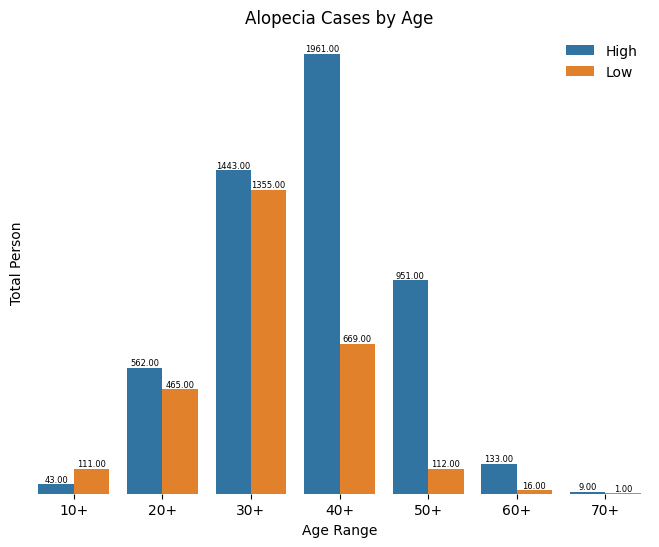

In [6]:
# age_range
df_age = df.groupby(['age_range', 'probability']).size().reset_index(name='count')

fig, ax = plt.subplots(figsize=(8,6))
barchart = sns.barplot(data=df_age, x='age_range', y='count', hue='probability', ax=ax)
ax.set_frame_on(False)
ax.set_yticks([])
ax.legend().set_title('')
ax.legend().set_frame_on(False)
plt.xlabel('Age Range')
plt.ylabel('Total Person')
plt.title('Alopecia Cases by Age')

for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2, p.get_height()), ha='center', va='bottom', fontsize=6)

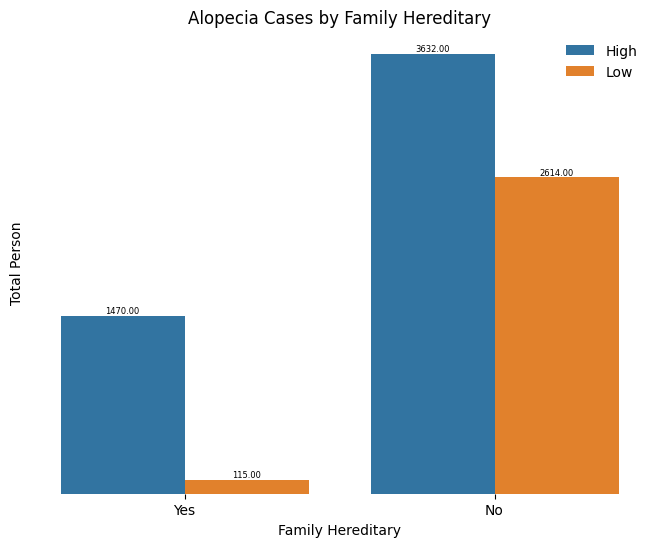

In [7]:
# Family Hereditary
df_hereditary = df.groupby(['family_hereditary', 'probability']).size().reset_index(name='count')

fig, ax = plt.subplots(figsize=(8,6))
barchart = sns.barplot(data=df_hereditary, x='family_hereditary', y='count', hue='probability', order=['Yes', 'No'], ax=ax)
ax.set_frame_on(False)
ax.set_yticks([])
ax.legend().set_title('')
ax.legend().set_frame_on(False)
plt.xlabel('Family Hereditary')
plt.ylabel('Total Person')
plt.title('Alopecia Cases by Family Hereditary')

for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2, p.get_height()), ha='center', va='bottom', fontsize=6)

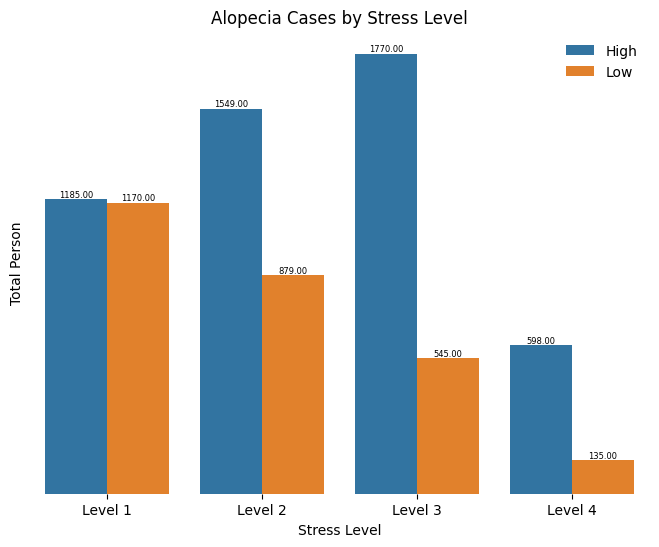

In [8]:
# Stress Level
df_stress = df.groupby(['stress_range', 'probability']).size().reset_index(name='count')

fig, ax = plt.subplots(figsize=(8,6))
barchart = sns.barplot(data=df_stress, x='stress_range', y='count', hue='probability', ax=ax)
ax.set_frame_on(False)
ax.set_yticks([])
ax.legend().set_title('')
ax.legend().set_frame_on(False)
plt.xlabel('Stress Level')
plt.ylabel('Total Person')
plt.title('Alopecia Cases by Stress Level')

for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2, p.get_height()), ha='center', va='bottom', fontsize=6)

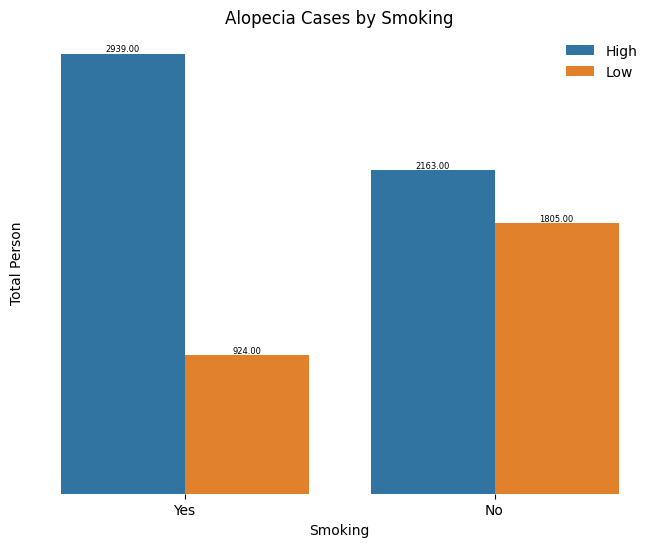

In [9]:
# Smoking
df_smoking = df.groupby(['smoking', 'probability']).size().reset_index(name='count')

fig, ax = plt.subplots(figsize=(8,6))
barchart = sns.barplot(data=df_smoking, x='smoking', y='count', hue='probability', order=['Yes', 'No'], ax=ax)
ax.set_frame_on(False)
ax.set_yticks([])
ax.legend().set_title('')
ax.legend().set_frame_on(False)
plt.xlabel('Smoking')
plt.ylabel('Total Person')
plt.title('Alopecia Cases by Smoking')

for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2, p.get_height()), ha='center', va='bottom', fontsize=6)